In [56]:
from matplotlib import pyplot as plt
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import numpy as np
import pandas as pd
from plotly import express as px
import re
import seaborn as sns
import string
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import warnings

plt.style.use('tableau-colorblind10')

warnings.filterwarnings('ignore')


In [57]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [58]:
# pd.read_csv()
df = pd.read_csv('/content/drive/MyDrive/Colab Datasets/flipkart_reviews_dataset.csv')
df.shape

(9374, 9)

In [59]:
df.head()


,product_id,product_title,rating,summary,review,location,date,upvotes,downvotes
0,ACCFZGAQJGYCYDCM,BoAt Rockerz 235v2 with ASAP charging Version ...,5,Terrific purchase,1-more flexible2-bass is very high3-sound clar...,Shirala,8 months ago,1390,276
1,ACCFZGAQJGYCYDCM,BoAt Rockerz 235v2 with ASAP charging Version ...,5,Terrific purchase,Super sound and good looking I like that prize,Visakhapatnam,8 months ago,643,133
2,ACCFZGAQJGYCYDCM,BoAt Rockerz 235v2 with ASAP charging Version ...,5,Super!,Very much satisfied with the device at this pr...,Kozhikode,"Feb, 2020",1449,328
3,ACCFZGAQJGYCYDCM,BoAt Rockerz 235v2 with ASAP charging Version ...,5,Super!,"Nice headphone, bass was very good and sound i...",Jaora,7 months ago,160,28
4,ACCFZGAQJGYCYDCM,BoAt Rockerz 235v2 with ASAP charging Version ...,5,Terrific purchase,Sound quality super battery backup super quali...,New Delhi,8 months ago,533,114


In [60]:
data = df[['review','rating','upvotes', 'downvotes']]

In [61]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9374 entries, 0 to 9373
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     9374 non-null   object
 1   rating     9374 non-null   int64 
 2   upvotes    9374 non-null   int64 
 3   downvotes  9374 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 293.1+ KB


In [62]:
emoji = re.compile("["
u"\U0001F600-\U0001F64F"  # emoticons
u"\U0001F300-\U0001F5FF"  # symbols & pictographs
u"\U0001F680-\U0001F6FF"  # transport & map symbols
u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
u"\U00002500-\U00002BEF"  # chinese char
u"\U00002702-\U000027B0"
u"\U00002702-\U000027B0"
u"\U000024C2-\U0001F251"
u"\U0001f926-\U0001f937"
u"\U00010000-\U0010ffff"
u"\u2640-\u2642" 
u"\u2600-\u2B55"
u"\u200d"
u"\u23cf"
u"\u23e9"
u"\u231a"
u"\ufe0f"  # dingbats
u"\u3030"
              "]+", re.UNICODE)


In [64]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
stopwords_ = set(stopwords.words('english'))

def clean_reviews(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopwords_]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    text =  re.sub(emoji, '', text)
    return text
    return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [65]:
data['review'] = data['review'].apply(clean_reviews)


In [66]:
data['review'][0]


'   clariti good  back   hour  thing fastest charg system avail  min charg get long  hour back  look awesom  game product support  want game ill recommend pleas dont buy want music product well  wireless headphon compar headphon pric'

In [67]:
rating = data['rating'].value_counts()
ratings = rating.index
values = rating.values

In [68]:
figure = px.pie(
            data, 
            values=values, 
            names=ratings,
            hole = 0.5,
            title = 'Review Ratings Distribution'
               )
figure.show()

In [69]:
def plotWordCloud(tokens):
    sentiment_dox = ' '.join(tokens)
    word_cloud = WordCloud().generate(sentiment_dox)
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [70]:
data_list = data['review'].tolist()
token = [token for line in data_list for token in line.split()]

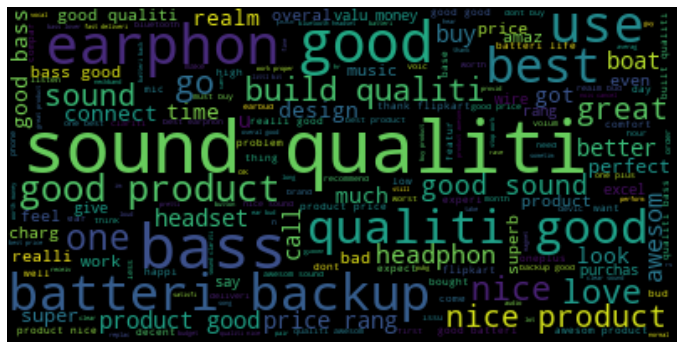

In [71]:
plt.figure(figsize=(12,15))
plotWordCloud(token)

In [72]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [73]:
data["positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["review"]]
data["negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["review"]]
data["neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["review"]]
data = data[["review", "positive", "negative", "neutral"]]


In [74]:
data.tail()

,review,positive,negative,neutral
9369,head phnes give good base pluge ear also spare...,0.352,0.0,0.648
9370,far one best headphon ive ever use extrem good...,0.474,0.0,0.526
9371,bass lover other like read review complet revi...,0.312,0.0,0.688
9372,use one month excel product clear sound good b...,0.550,0.0,0.450
9373,excel qualiti work good super happi product,0.710,0.0,0.290


In [75]:
x = sum(data["positive"])
y = sum(data["negative"])
z = sum(data["neutral"])

In [76]:
def sentiment_score(x, y, z):
    if (x>y) and (x>z):
        print("positive")
    elif (y>x) and (y>z):
        print("negative")
    else:
        print("neutral")
        
sentiment_score(x, y, z)

neutral


In [77]:
print(f"Positive: {x}")
print(f"Negative: {y}")
print(f"Neutral: {z}")

Positive: 3826.7980000000753
Negative: 519.3489999999998
Neutral: 5024.857999999945
